# Constraining Stress Magnitudes from Wellbore Failure

Build a stress polygon diagram to constrain the possible stress magnitudes for data from a well. Image logs from which the fractures are picked show no signs of drilling induced tensile fractures or wellbore breakouts. Use these key observations of the lack of wellbore failure combined with the relations for borehole stresses and frictional faulting theory to construct a stress polygon.

In [111]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Part 1A: Given values, use the values below for your calculations of the components of the stress polygon

In [134]:
#  Key Input variables
Sv = 1.12  # (psi/ft). This is the vertical stress
Pp = 0.63  # (psi/ft). This is the pore pressure
μ = 0.60   # Coefficient of sliding friction
wBO = 0    # Width of Wellbore Breakout (expressed as an angle), setting this value to 0
T0 = 0     # (psi/ft). Rock tensile strength. Rocks are very weak in tension.
Ceff = 3.5 # (psi/ft). Effective rock compressive strength
ΔP = 0.16  # (psi/ft). Additional pore pressure from drilling mud weight
σΔT = 0    # No thermal stresses

In [135]:
# Reformulating the Frictional Faulting Theory equation for S1 and S3:
# S1 = fμ * (S3 - Pp) + Pp
# S3 = ((S1 - Pp) / fμ) + Pp
fμ = ((μ**2+1)**0.5+μ)**2    # Coefficient ratio of sliding friction
print('fμ =', fμ)

# Determine S1 - Maximum Stress
S3a = Sv     # Set S3 to be Sv
S1 = fμ * (S3a - Pp) + Pp
print('Maximum Stress (S1) =',S1, 'psi/ft')

# Determine S3 - Minimum Stress
S1a = Sv     # Set S1 to be Sv
S3 = ((S1a - Pp) / fμ) + Pp
print('Minimum Stress (S3) =', S3, 'psi/ft')

fμ = 3.119428454762872
Maximum Stress (S1) = 2.1585199428338075 psi/ft
Minimum Stress (S3) = 0.7870800571661927 psi/ft


## Part 2: Calculate stress magnitude constraints for each faulting regime

Use frictional faulting theory relationships to calculate the stress magnitude constraints for each faulting regime in units of psi/ft.

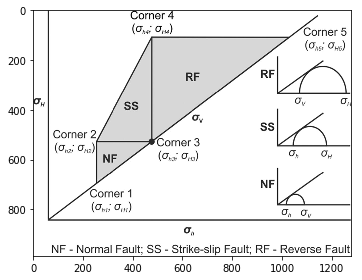

In [136]:
from skimage import io

io.imshow(io.imread("https://sp.lyellcollection.org/content/specpubgsl/458/1/273/F4.large.jpg"))
io.show()

In [137]:
# Need 5 sets of points zig zagging from bottom left to top right of the figuer above.
Corner1 = [S3, S3]
Corner2 = [S3, Sv]
Corner3 = [Sv, Sv]
Corner4 = [Sv, S1]
Corner5 = [S1, S1]
print(Corner1, Corner2, Corner3, Corner4, Corner5)

[0.7870800571661927, 0.7870800571661927] [0.7870800571661927, 1.12] [1.12, 1.12] [1.12, 2.1585199428338075] [2.1585199428338075, 2.1585199428338075]


In [138]:
# Based on the diagram above, here are the Shmin and Shmax lists
Sh_min = [S3, S3, Sv, Sv, S1]
Sh_max = [S3, Sv, Sv, S1, S1]

# Create a zipped list of tuples from above lists
x = zip(Sh_min, Sh_max)

# Creating a dataframe object from a ziped list
df = pd.DataFrame(x, columns = ['Sh_min (psi/ft)', 'Sh_max (psi/ft)'])
df

,Sh_min (psi/ft),Sh_max (psi/ft)
0,0.78708,0.78708
1,0.78708,1.12000
2,1.12000,1.12000
3,1.12000,2.15852
4,2.15852,2.15852


## Part 3: Calculate stress magnitude constraints from wellbore failure observations

Use relationships for wellbore stress magnitudes to calculate the stress magnitude constraints in units of psi/ft.

In [139]:
# Wellbore Breakouts inputs
thetaB = 180-wBO
cos_thetaB = np.cos(np.deg2rad(thetaB))

# Create new columns to calculate the Wellbore breakout and tensile fracture stresses in psi/ft
df['Sh_max_bo (psi/ft)']= ((Ceff+2*Pp+ΔP+σΔT)-(df['Sh_min (psi/ft)']*(1+2*cos_thetaB)))/(1-2*cos_thetaB) # break-out stress
df['Sh_max_tf (psi/ft)']= Shmax_tf = 3*df['Sh_min (psi/ft)'] - 2*Pp - ΔP - T0 - σΔT               # tensile fracture stress
df

,Sh_min (psi/ft),Sh_max (psi/ft),Sh_max_bo (psi/ft),Sh_max_tf (psi/ft)
0,0.78708,0.78708,1.902360,0.94124
1,0.78708,1.12000,1.902360,0.94124
2,1.12000,1.12000,2.013333,1.94000
3,1.12000,2.15852,2.013333,1.94000
4,2.15852,2.15852,2.359507,5.05556


In [140]:
# Drop certain rows to retain corner points 1 and 5 - so that, a line can be drawn connecting these 2 points
df1 = df.drop(df.index[[1,2,3]])
df1

,Sh_min (psi/ft),Sh_max (psi/ft),Sh_max_bo (psi/ft),Sh_max_tf (psi/ft)
0,0.78708,0.78708,1.902360,0.94124
4,2.15852,2.15852,2.359507,5.05556


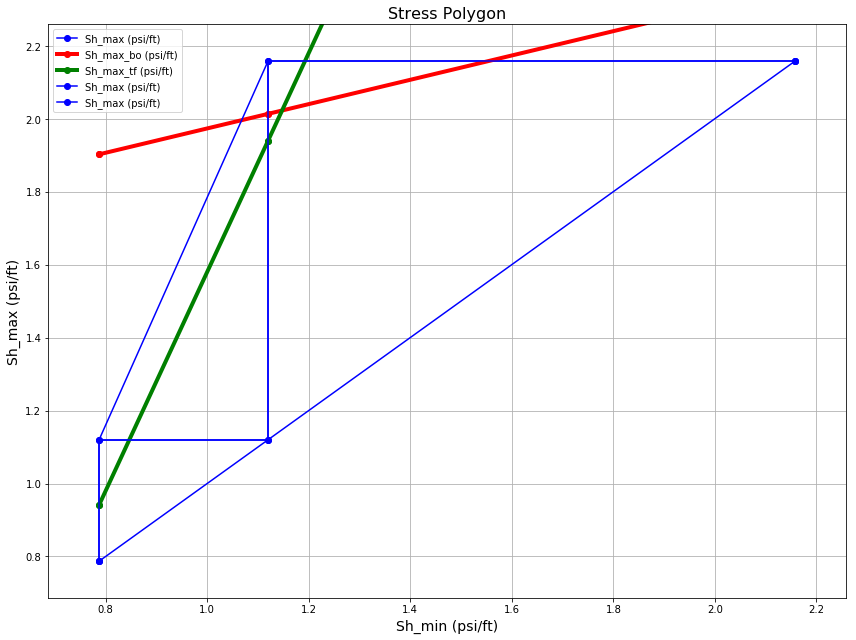

In [141]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
ax1.set_title('Stress Polygon', fontsize = '16')
plt.xlabel('Sh_min (psi/ft)', fontsize = '14')
plt.ylabel('Sh_max (psi/ft)', fontsize = '14')
ax1.set_xlim(df['Sh_min (psi/ft)'].min()-0.1, df['Sh_min (psi/ft)'].max()+0.1)
ax1.set_ylim(df['Sh_max (psi/ft)'].min()-0.1, df['Sh_max (psi/ft)'].max()+0.1)
plt.tight_layout()
plt.grid()
#plt.scatter(df['Sh_min (psi/ft)'], df['Sh_max (psi/ft)'])
plt.plot(df['Sh_min (psi/ft)'], df['Sh_max (psi/ft)'], '-o', c='b')
plt.plot(df['Sh_min (psi/ft)'], df['Sh_max_bo (psi/ft)'], '-o', c='r', linewidth=4)
plt.plot(df['Sh_min (psi/ft)'], df['Sh_max_tf (psi/ft)'], '-o', c='g',linewidth=4)
plt.plot(df['Sh_min (psi/ft)'], df['Sh_max (psi/ft)'], '-o', c='b')
plt.plot(df1['Sh_min (psi/ft)'], df1['Sh_max (psi/ft)'], '-o', c='b')
plt.plot(Corner2, Corner4, 'b')
plt.legend()
plt.show()

Break-out and tensile fracture stresses indicate a reverse faulting regime.